In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from scipy.signal import savgol_filter

np.random.seed(0)

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

path = "coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)




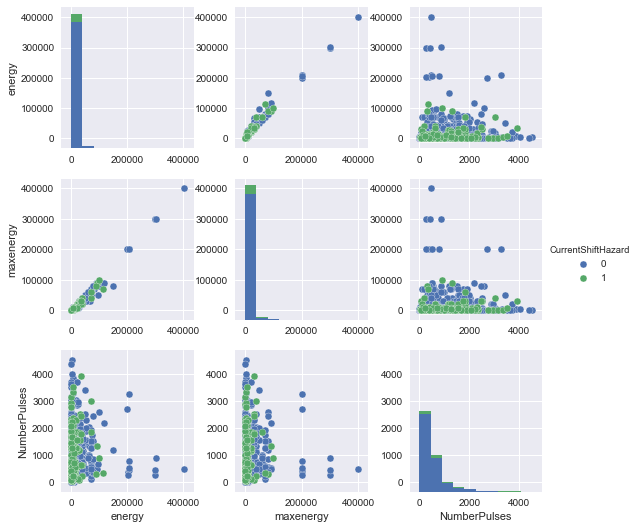

In [3]:
import seaborn as sns
g = sns.pairplot(data, hue="CurrentShiftHazard", vars = ["energy", "maxenergy", "NumberPulses"])

In [10]:
categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]
    
X = data[features]
y = data[target]


scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)


instance_data = data.drop("CurrentShiftHazard", axis=1)

X.shape

(2584, 25)

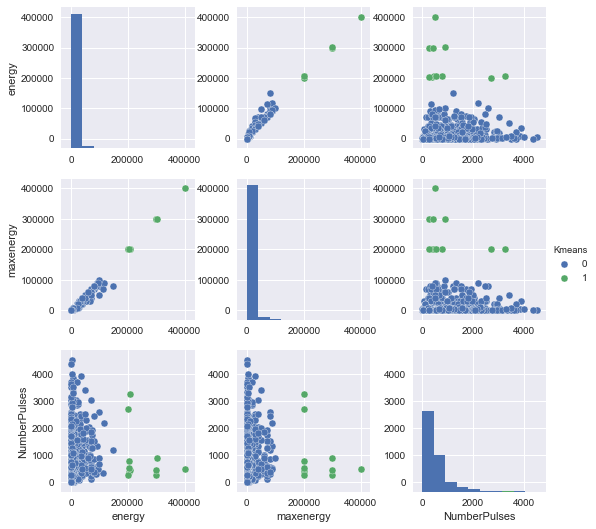

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

data["Kmeans"] = kmeans

g = sns.pairplot(data, hue="Kmeans", vars = ["energy", "maxenergy", "NumberPulses"])


[244844.56731336977, 147972.92959886245, 92167.86078582554, 74471.41337822827, 58928.23630960754, 47923.050957142885, 41629.23822048785, 38273.34545092881, 35300.019862682195, 32780.37423822833, 29806.95289234192, 27862.03478213949, 25976.079273506482, 24137.162006077324, 23028.87953290248, 21636.995930244415, 21148.619042424958, 19854.708873967968, 18995.99776598075, 18304.058850215224, 17808.772835866097, 17193.507711139067, 16475.971241062307, 16004.925447046466, 15683.82784416385, 15455.110734730168, 15169.444553920945, 14716.94767616193, 14511.057091099517, 14126.310292814556, 13825.651084906573, 13490.322076967206, 13335.89419456604, 13146.931262324686, 12913.474011848433, 12841.787623009543, 12526.943592336158, 12313.432259116376, 12130.485069189826, 12103.102756438246, 11752.988909064195, 11650.720866441676, 11419.045174634282, 11228.792301204328, 10994.653607898184, 11046.388289319368, 10947.877442774281, 10768.45244126587]


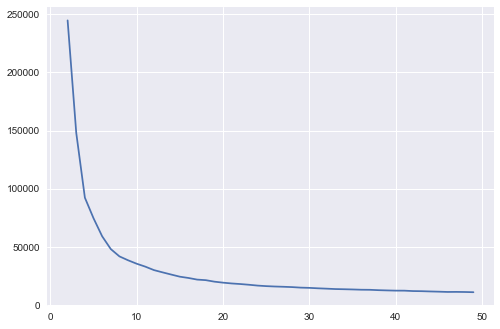

In [6]:
inertias = []
for k in range(2,50):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10).fit(X)
    inertias.append(kmeans.inertia_)

from numpy import diff


plt.plot(range(2,50), inertias)
print(inertias)

[-39065.27409438707, -110089.18576750367, -145216.58036246838, -185981.16325740507, -194143.26409200995, -195530.5441660135, -195771.2850161639, -196590.88888994252, -197170.58528410934, -194671.51415154888, -194200.106962351, -191329.3582853443, -189837.11529862287, -189883.90497718475, -192051.23859306396, -189545.85519628332, -189570.0765874699, -197771.3914079819, -175071.32668025914, -183473.23045544393, -191266.66025589436, -176852.27228014576, -168619.74209018808, -171339.0533036291, -172586.23453262087, -162395.58271082104, -161346.88143726744, -166726.0372516914]


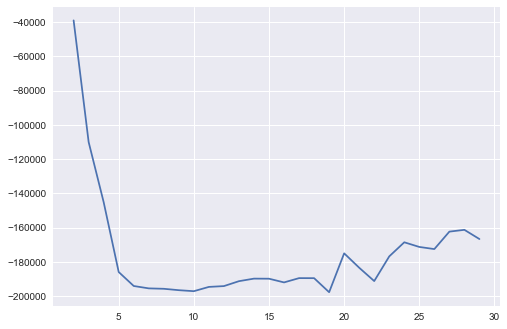

In [9]:
from sklearn.mixture import GaussianMixture

inertias = []
for k in range(2,30):
    gm = GaussianMixture(n_components=k, random_state=0, n_init = 10).fit(instance_data)
    inertias.append(gm.bic(instance_data))

plt.plot(range(2,30), inertias)
print(inertias)

[9.85209010e-01 1.47117877e-02 7.65196595e-05 2.52756996e-06
 1.39255243e-07 1.61607616e-08 3.28109963e-11 9.05033636e-12
 7.62029346e-12 6.86675163e-12 5.62691691e-12 2.28233264e-12
 9.16220192e-13 6.25222477e-13 1.40688201e-13 3.12230472e-14
 4.48315162e-15 2.39217597e-15 2.16152617e-43 1.22520025e-43
 4.91399718e-44 3.23953721e-44 1.24897696e-44 7.32655193e-46
 3.01591901e-46]


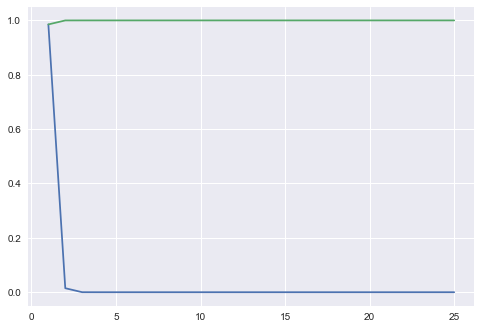

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
pca.fit(instance_data)
print(pca.explained_variance_ratio_)


plt.plot(range(1,26), pca.explained_variance_ratio_)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,26), cumulative)

This sort of explains the issues we've been having all along:

[9.85209010e-01 1.47117877e-02 7.65196595e-05 2.52756996e-06
 1.39255243e-07]


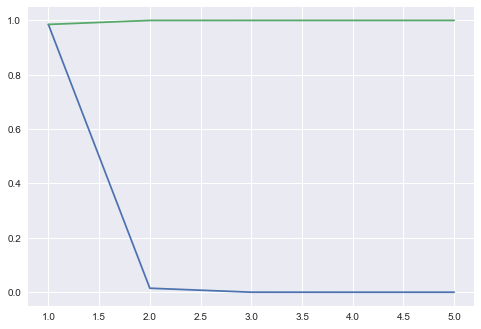

In [14]:
pca = PCA(n_components=5)
pca.fit(instance_data)
print(pca.explained_variance_ratio_)


plt.plot(range(1,6), pca.explained_variance_ratio_)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,6), cumulative)

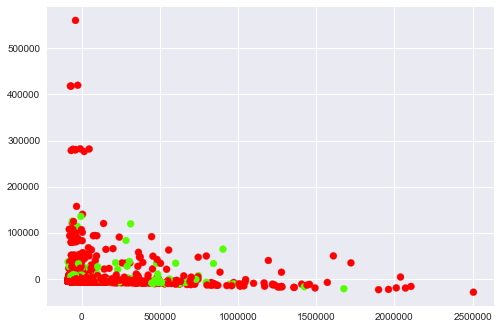

In [15]:
transform_data = pca.transform(instance_data)
scatter = plt.scatter(transform_data[:,0], transform_data[:,1], c=data["CurrentShiftHazard"], cmap="prism")

In [17]:
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go


transform_data = pca.transform(instance_data)
#print(transform_data)

#transform_data['Facies'] = data["Facies"]
offline.init_notebook_mode()

print(transform_data[:,0])

trace1 = go.Scatter3d(
    x = transform_data[:,0],
    y = transform_data[:,1],
    z = transform_data[:,2],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = data['CurrentShiftHazard'],
        colorscale='Rainbow'
    )

)

layout = go.Layout(
    width=500,
    height=500
)


fig = go.Figure(data=[trace1])

offline.iplot(fig, filename='simple-3d-scatter')

[-64839.97028756 -53129.61995142 -54999.6588397  ... -47420.72259097
 -77180.15516096 -12432.50908472]
